In [12]:
#Team 7: We are working on data to analyze the stock market for some retails company's to check the performance of their stocks during the covid-19 pandemic (pre-vaccine vs post vaccine release).

#Questions:
#1. How did the stocks performs pre covid? (Jan - 2019 to  Dec -2019)
#2. How did the stocks performs during the pandemic before the vaccine release? Feb-2020 to Aug - 2021
#How did the stocks perform during the pandemic after the vaccine release? Sept-2021 to Sept-2022

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
import yfinance as yf
import datetime as dt

In [14]:
#Lowes data
import yfinance as yf

lowes=yf.Ticker("LOW")

print(lowes)

# get stock info
lowes.info

# get historical market data, here max is 5 years.
lowes.history(period="max")

yfinance.Ticker object <LOW>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,0.292091,0.284909,0.284909,217600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,0.287303,0.277726,0.277726,272000,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,0.280120,0.275332,0.277726,777600,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,0.282515,0.277726,0.277726,2105600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,0.280120,0.272938,0.272938,348800,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,183.570007,187.800003,181.039993,186.559998,2715300,0.0,0.0
2022-11-08 00:00:00-05:00,188.059998,190.009995,185.779999,188.360001,2880800,0.0,0.0
2022-11-09 00:00:00-05:00,187.309998,191.270004,186.309998,186.630005,3007200,0.0,0.0


In [15]:
# Convert the lowes data into a Pandas DataFrame
lowes_data_df = pd.DataFrame(lowes.history(period="max"))

# Show Record Count
lowes_data_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,0.292091,0.284909,0.284909,217600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,0.287303,0.277726,0.277726,272000,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,0.280120,0.275332,0.277726,777600,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,0.282515,0.277726,0.277726,2105600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,0.280120,0.272938,0.272938,348800,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,183.570007,187.800003,181.039993,186.559998,2715300,0.0,0.0
2022-11-08 00:00:00-05:00,188.059998,190.009995,185.779999,188.360001,2880800,0.0,0.0
2022-11-09 00:00:00-05:00,187.309998,191.270004,186.309998,186.630005,3007200,0.0,0.0


In [16]:
#Pulling Lowes data 
lowes_data_df.reset_index(inplace=True)
lowes_data_df['index'] = lowes_data_df.index
lowes_data_df['Date'] = pd.to_datetime(lowes_data_df['Date'], format='%Y-%m-%d')
lowes_data_df = lowes_data_df[["Date","Close"]]
lowes_data_df

,Date,Close
0,1980-03-17 00:00:00-05:00,0.284909
1,1980-03-18 00:00:00-05:00,0.277726
2,1980-03-19 00:00:00-05:00,0.277726
3,1980-03-20 00:00:00-05:00,0.277726
4,1980-03-21 00:00:00-05:00,0.272938
...,...,...
10753,2022-11-07 00:00:00-05:00,186.559998
10754,2022-11-08 00:00:00-05:00,188.360001
10755,2022-11-09 00:00:00-05:00,186.630005
10756,2022-11-10 00:00:00-05:00,204.320007


In [17]:
# Export the City_Data into a csv
lowes_data_df.to_csv("lowes.csv")

In [18]:
lowes_data_df.dtypes

Date     datetime64[ns, America/New_York]
Close                             float64
dtype: object

In [19]:
lowes_pre_covid_df = lowes_data_df.loc[((lowes_data_df['Date'].dt.year == 2019))]
lowes_pre_covid_df.sort_values(by=['Date'])

,Date,Close
9783,2019-01-02 00:00:00-05:00,86.047882
9784,2019-01-03 00:00:00-05:00,85.022064
9785,2019-01-04 00:00:00-05:00,87.539986
9786,2019-01-07 00:00:00-05:00,89.199974
9787,2019-01-08 00:00:00-05:00,91.046455
...,...,...
10030,2019-12-24 00:00:00-05:00,113.905365
10031,2019-12-26 00:00:00-05:00,113.867340
10032,2019-12-27 00:00:00-05:00,114.342873
10033,2019-12-30 00:00:00-05:00,114.171669


In [20]:
#lowes_pre_covid_month = lowes_pre_covid_df.loc[((lowes_pre_covid_df['Date'].dt.month == 1))]
#lowes_pre_covid_month

#Create a dataframe for Target pre-covid stock data (Jan 2019 - Dec 2019) By Month
monthly_close_pre_covid_df = pd.DataFrame(lowes_pre_covid_df.groupby(lowes_pre_covid_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_pre_covid_df['Store'] = 'Lowes'
monthly_close_pre_covid_df['Timeframe'] = 'Pre-Covid'

monthly_close_pre_covid_df

,Month,Close,Store,Timeframe
0,1,88.150026,Lowes,Pre-Covid
1,2,95.365171,Lowes,Pre-Covid
2,3,97.004632,Lowes,Pre-Covid
3,4,106.829589,Lowes,Pre-Covid
4,5,97.962674,Lowes,Pre-Covid
5,6,92.448916,Lowes,Pre-Covid
6,7,97.950395,Lowes,Pre-Covid
7,8,95.733546,Lowes,Pre-Covid
8,9,106.231023,Lowes,Pre-Covid
9,10,104.403743,Lowes,Pre-Covid


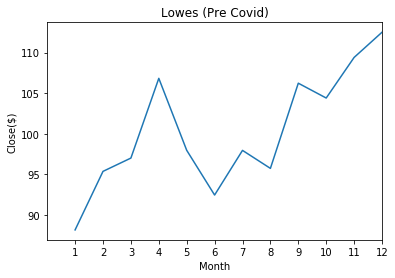

In [32]:
x = monthly_close_pre_covid_df['Month']
y = monthly_close_pre_covid_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes (Pre Covid)");

In [36]:
#Pre Covid(Jan 2019-Dec 2019)
import yfinance as yf

Walmart=yf.Ticker("WMT")

print(Walmart)

# get stock info
Walmart.info

# get historical market data, here max is 5 years.
Walmart.history(period="max")

yfinance.Ticker object <WMT>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-08-25 00:00:00-04:00,0.035473,0.036155,0.035473,0.036018,2508800,0.0,0.0
1972-08-28 00:00:00-04:00,0.036018,0.036291,0.035882,0.035882,972800,0.0,0.0
1972-08-29 00:00:00-04:00,0.035746,0.035746,0.035473,0.035473,1945600,0.0,0.0
1972-08-30 00:00:00-04:00,0.035473,0.035473,0.035200,0.035473,409600,0.0,0.0
1972-08-31 00:00:00-04:00,0.035200,0.035200,0.034927,0.034927,870400,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,141.259995,142.970001,141.259995,142.449997,3788000,0.0,0.0
2022-11-08 00:00:00-05:00,142.580002,144.070007,141.509995,142.789993,5022800,0.0,0.0
2022-11-09 00:00:00-05:00,142.759995,143.160004,139.210007,139.470001,5310700,0.0,0.0


In [38]:
Walmart_data_df = pd.DataFrame(Walmart.history(period="max"))
Walmart_data_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1972-08-25 00:00:00-04:00,0.035473,0.036155,0.035473,0.036018,2508800,0.0,0.0
1972-08-28 00:00:00-04:00,0.036018,0.036291,0.035882,0.035882,972800,0.0,0.0
1972-08-29 00:00:00-04:00,0.035746,0.035746,0.035473,0.035473,1945600,0.0,0.0
1972-08-30 00:00:00-04:00,0.035473,0.035473,0.035200,0.035473,409600,0.0,0.0
1972-08-31 00:00:00-04:00,0.035200,0.035200,0.034927,0.034927,870400,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,141.259995,142.970001,141.259995,142.449997,3788000,0.0,0.0
2022-11-08 00:00:00-05:00,142.580002,144.070007,141.509995,142.789993,5022800,0.0,0.0
2022-11-09 00:00:00-05:00,142.759995,143.160004,139.210007,139.470001,5310700,0.0,0.0


In [39]:
Walmart_data_df.to_csv("Walmart.csv")

In [40]:
Walmart_data_df.reset_index(inplace=True)
Walmart_data_df['index'] = Walmart_data_df.index
Walmart_data_df['Date'] = pd.to_datetime(Walmart_data_df['Date'], format='%Y-%m-%d')
Walmart_data_df = Walmart_data_df[["Date","Close"]]
Walmart_data_df

,Date,Close
0,1972-08-25 00:00:00-04:00,0.036018
1,1972-08-28 00:00:00-04:00,0.035882
2,1972-08-29 00:00:00-04:00,0.035473
3,1972-08-30 00:00:00-04:00,0.035473
4,1972-08-31 00:00:00-04:00,0.034927
...,...,...
12659,2022-11-07 00:00:00-05:00,142.449997
12660,2022-11-08 00:00:00-05:00,142.789993
12661,2022-11-09 00:00:00-05:00,139.470001
12662,2022-11-10 00:00:00-05:00,142.360001


In [41]:
Walmart_pre_covid_df = Walmart_data_df.loc[((Walmart_data_df['Date'].dt.year == 2019))]
Walmart_pre_covid_df.sort_values(by=['Date'])

,Date,Close
11689,2019-01-02 00:00:00-05:00,87.534355
11690,2019-01-03 00:00:00-05:00,87.084213
11691,2019-01-04 00:00:00-05:00,87.628136
11692,2019-01-07 00:00:00-05:00,88.659706
11693,2019-01-08 00:00:00-05:00,89.278671
...,...,...
11936,2019-12-24 00:00:00-05:00,114.346458
11937,2019-12-26 00:00:00-05:00,114.356003
11938,2019-12-27 00:00:00-05:00,114.422966
11939,2019-12-30 00:00:00-05:00,114.241188


In [42]:
#Create a dataframe for Walmart pre-covid stock data (Jan 2019 - Dec 2019) By Month
monthly_close_pre_covid_df = pd.DataFrame(Walmart_pre_covid_df.groupby(Walmart_pre_covid_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_pre_covid_df['Store'] = 'Walmart'
monthly_close_pre_covid_df['Timeframe'] = 'Pre-Covid'

monthly_close_pre_covid_df

,Month,Close,Store,Timeframe
0,1,89.849827,Walmart,Pre-Covid
1,2,91.693745,Walmart,Pre-Covid
2,3,92.446725,Walmart,Pre-Covid
3,4,95.132824,Walmart,Pre-Covid
4,5,95.935223,Walmart,Pre-Covid
5,6,102.591158,Walmart,Pre-Covid
6,7,106.997392,Walmart,Pre-Covid
7,8,104.942946,Walmart,Pre-Covid
8,9,111.288795,Walmart,Pre-Covid
9,10,112.963654,Walmart,Pre-Covid


Text(0.5, 1.0, 'Walmart(Pre Covid)')

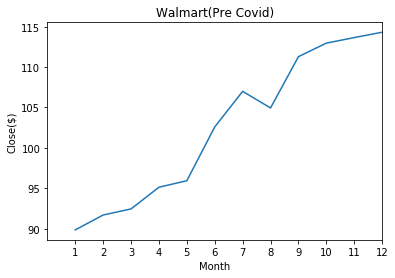

In [43]:
x = monthly_close_pre_covid_df['Month']
y = monthly_close_pre_covid_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Walmart(Pre Covid)")

In [22]:
#2. How did the stocks performs during the pandemic before the vaccine release? (Jan 2020 - Nov 2020)

#Dateframe Before Vaccine(Jan 2020 - Nov 2020)
lowes_before_vaccine_df = lowes_data_df.loc[((lowes_data_df['Date'] >= '2020-01-01') & (lowes_data_df['Date'] < '2020-12-01'))]
lowes_before_vaccine_df.sort_values(by=['Date'])

,Date,Close
10035,2020-01-02 00:00:00-05:00,114.561600
10036,2020-01-03 00:00:00-05:00,113.743698
10037,2020-01-06 00:00:00-05:00,114.456985
10038,2020-01-07 00:00:00-05:00,113.772232
10039,2020-01-08 00:00:00-05:00,115.579208
...,...,...
10261,2020-11-23 00:00:00-05:00,148.734344
10262,2020-11-24 00:00:00-05:00,149.982910
10263,2020-11-25 00:00:00-05:00,149.905487
10264,2020-11-27 00:00:00-05:00,149.702209


In [23]:
#Create a dataframe for Lowes before Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_before_vaccine_df = pd.DataFrame(lowes_before_vaccine_df.groupby(lowes_before_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_before_vaccine_df['Store'] = 'Lowes'
monthly_close_before_vaccine_df['Timeframe'] = 'Before Vaccine'

monthly_close_before_vaccine_df

,Month,Close,Store,Timeframe
0,1,114.796649,Lowes,Before Vaccine
1,2,115.070815,Lowes,Before Vaccine
2,3,84.929567,Lowes,Before Vaccine
3,4,90.547316,Lowes,Before Vaccine
4,5,111.487030,Lowes,Before Vaccine
5,6,126.162308,Lowes,Before Vaccine
6,7,136.960831,Lowes,Before Vaccine
7,8,152.574951,Lowes,Before Vaccine
8,9,156.297717,Lowes,Before Vaccine
9,10,164.156582,Lowes,Before Vaccine


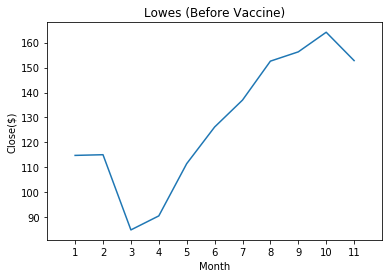

In [31]:
x = monthly_close_before_vaccine_df['Month']
y = monthly_close_before_vaccine_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes (Before Vaccine)");

In [44]:
#Dateframe Before Vaccine(Jan 2020 - Nov 2020)
Walmart_before_vaccine_df = Walmart_data_df.loc[((Walmart_data_df['Date'] >= '2020-01-01') & (Walmart_data_df['Date'] < '2020-12-01'))]
Walmart_before_vaccine_df.sort_values(by=['Date'])

,Date,Close
11941,2020-01-02 00:00:00-05:00,113.801071
11942,2020-01-03 00:00:00-05:00,112.796432
11943,2020-01-06 00:00:00-05:00,112.566795
11944,2020-01-07 00:00:00-05:00,111.523895
11945,2020-01-08 00:00:00-05:00,111.141182
...,...,...
12167,2020-11-23 00:00:00-05:00,146.284866
12168,2020-11-24 00:00:00-05:00,146.701599
12169,2020-11-25 00:00:00-05:00,147.157166
12170,2020-11-27 00:00:00-05:00,146.934250


In [45]:
#Create a dataframe for Walmart before Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_before_vaccine_df = pd.DataFrame(Walmart_before_vaccine_df.groupby(Walmart_before_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_before_vaccine_df['Store'] = 'Walmart'
monthly_close_before_vaccine_df['Timeframe'] = 'Before Vaccine'

monthly_close_before_vaccine_df

,Month,Close,Store,Timeframe
0,1,111.189929,Walmart,Before Vaccine
1,2,110.640119,Walmart,Before Vaccine
2,3,109.670099,Walmart,Before Vaccine
3,4,120.885815,Walmart,Before Vaccine
4,5,119.657996,Walmart,Before Vaccine
5,6,116.319357,Walmart,Before Vaccine
6,7,124.500330,Walmart,Before Vaccine
7,8,128.194786,Walmart,Before Vaccine
8,9,134.632018,Walmart,Before Vaccine
9,10,138.206376,Walmart,Before Vaccine


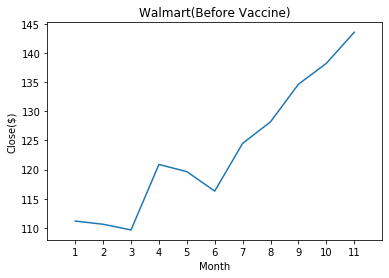

In [46]:
x = monthly_close_before_vaccine_df['Month']
y = monthly_close_before_vaccine_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Walmart(Before Vaccine)");

In [25]:
#Dateframe After Vaccine(Dec 2020 - Dec 2021)
lowes_after_vaccine_df = lowes_data_df.loc[((lowes_data_df['Date'] > '2020-11-30') & (lowes_data_df['Date'] <= '2021-12-31'))]
lowes_after_vaccine_df.sort_values(by=['Date'])

,Date,Close
10266,2020-12-01 00:00:00-05:00,148.472992
10267,2020-12-02 00:00:00-05:00,146.934052
10268,2020-12-03 00:00:00-05:00,147.088928
10269,2020-12-04 00:00:00-05:00,145.182205
10270,2020-12-07 00:00:00-05:00,147.108307
...,...,...
10535,2021-12-27 00:00:00-05:00,249.069046
10536,2021-12-28 00:00:00-05:00,249.383240
10537,2021-12-29 00:00:00-05:00,252.868439
10538,2021-12-30 00:00:00-05:00,251.709991


In [26]:
#3. How did the stocks perform during the pandemic after the vaccine release? Jan 2020 - Nov 2020
#Create a dataframe for Lowes After Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_after_vaccine_df = pd.DataFrame(lowes_after_vaccine_df.groupby(lowes_after_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_after_vaccine_df['Store'] = 'Lowes'
monthly_close_after_vaccine_df['Timeframe'] = 'After Vaccine'

monthly_close_after_vaccine_df

,Month,Close,Store,Timeframe
0,1,163.419691,Lowes,After Vaccine
1,2,166.780477,Lowes,After Vaccine
2,3,169.011627,Lowes,After Vaccine
3,4,193.681309,Lowes,After Vaccine
4,5,192.620158,Lowes,After Vaccine
5,6,185.515793,Lowes,After Vaccine
6,7,190.273588,Lowes,After Vaccine
7,8,192.649810,Lowes,After Vaccine
8,9,201.593034,Lowes,After Vaccine
9,10,213.830127,Lowes,After Vaccine


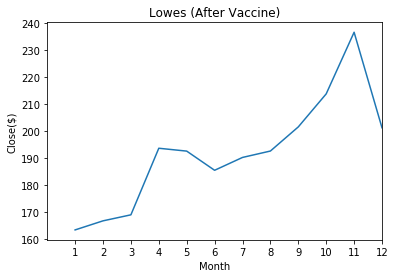

In [33]:
x = monthly_close_after_vaccine_df['Month']
y = monthly_close_after_vaccine_df['Close']
plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes (After Vaccine)");

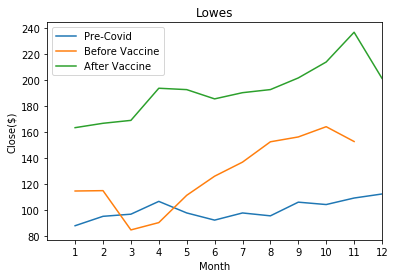

In [35]:
frames = [monthly_close_pre_covid_df, monthly_close_before_vaccine_df, monthly_close_after_vaccine_df]

lowes_FINAL_df = pd.concat(frames)

fig,ax = plt.subplots()

for timeframe in ['Pre-Covid', 'Before Vaccine', 'After Vaccine']:
    ax.plot(lowes_FINAL_df[lowes_FINAL_df.Timeframe==timeframe].Month,lowes_FINAL_df[lowes_FINAL_df.Timeframe==timeframe].Close,label=timeframe)

plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes ()")
ax.legend(loc='best');

In [47]:
#Dateframe After Vaccine(Dec 2020 - Dec 2021)
Walmart_after_vaccine_df = Walmart_data_df.loc[((Walmart_data_df['Date'] > '2020-11-30') & (Walmart_data_df['Date'] <= '2021-12-31'))]
Walmart_after_vaccine_df.sort_values(by=['Date'])

,Date,Close
12172,2020-12-01 00:00:00-05:00,147.942230
12173,2020-12-02 00:00:00-05:00,145.887482
12174,2020-12-03 00:00:00-05:00,144.705017
12175,2020-12-04 00:00:00-05:00,144.327042
12176,2020-12-07 00:00:00-05:00,143.551636
...,...,...
12441,2021-12-27 00:00:00-05:00,139.104019
12442,2021-12-28 00:00:00-05:00,141.100250
12443,2021-12-29 00:00:00-05:00,141.031082
12444,2021-12-30 00:00:00-05:00,141.485672


In [48]:
#Create a dataframe for Target After Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_after_vaccine_df = pd.DataFrame(Walmart_after_vaccine_df.groupby(Walmart_after_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_after_vaccine_df['Store'] = 'Walmart'
monthly_close_after_vaccine_df['Timeframe'] = 'After Vaccine'

monthly_close_after_vaccine_df

,Month,Close,Store,Timeframe
0,1,141.788834,Walmart,After Vaccine
1,2,136.633175,Walmart,After Vaccine
2,3,128.750175,Walmart,After Vaccine
3,4,136.229757,Walmart,After Vaccine
4,5,137.978574,Walmart,After Vaccine
5,6,136.345677,Walmart,After Vaccine
6,7,138.435152,Walmart,After Vaccine
7,8,145.327045,Walmart,After Vaccine
8,9,142.169243,Walmart,After Vaccine
9,10,140.392388,Walmart,After Vaccine


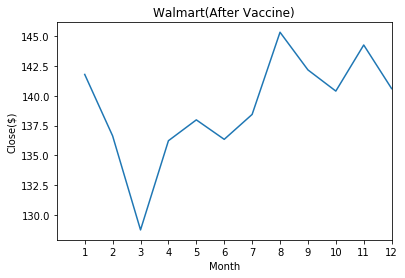

In [49]:
x = monthly_close_after_vaccine_df['Month']
y = monthly_close_after_vaccine_df['Close']
plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Walmart(After Vaccine)");

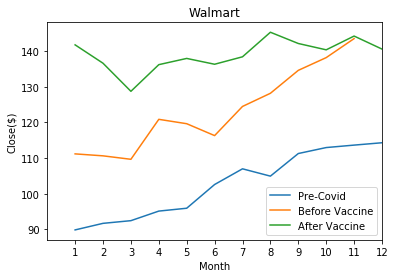

In [51]:
frames = [monthly_close_pre_covid_df, monthly_close_before_vaccine_df, monthly_close_after_vaccine_df]

Walmart_FINAL_df = pd.concat(frames)

fig,ax = plt.subplots()

for timeframe in ['Pre-Covid', 'Before Vaccine', 'After Vaccine']:
    ax.plot(Walmart_FINAL_df[Walmart_FINAL_df.Timeframe==timeframe].Month,Walmart_FINAL_df[Walmart_FINAL_df.Timeframe==timeframe].Close,label=timeframe)

plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Walmart")
ax.legend(loc='best');